<a href="https://colab.research.google.com/github/fullstacksam23/Trashnet-Classifier/blob/main/Trash_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *

In [ ]:
# 🧠 STEP 1: Import Libraries
import shutil
import os

# 🗂 STEP 2: Download and Prepare Dataset (TrashNet)
!git clone https://github.com/garythung/trashnet.git
 # The organized folder with class subfolders

Cloning into 'trashnet'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 45 (delta 6), reused 0 (delta 0), pack-reused 33 (from 1)
Receiving objects: 100% (45/45), 40.64 MiB | 44.94 MiB/s, done.
Resolving deltas: 100% (12/12), done.


FileNotFoundError: [Errno 2] No such file or directory: 'trashnet/data/dataset-resized'

In [ ]:
path = Path('./trashnet/data/dataset-resized.zip')

In [ ]:
from zipfile import ZipFile
with ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall("dataset-resized")

In [ ]:
path = Path('/content/dataset-resized/dataset-resized')

In [ ]:
path.ls()

(#8) [Path('/content/dataset-resized/dataset-resized/paper'),Path('/content/dataset-resized/dataset-resized/trash'),Path('/content/dataset-resized/dataset-resized/cardboard'),Path('/content/dataset-resized/dataset-resized/plastic'),Path('/content/dataset-resized/dataset-resized/.DS_Store'),Path('/content/dataset-resized/dataset-resized/trash_classifier.pkl'),Path('/content/dataset-resized/dataset-resized/metal'),Path('/content/dataset-resized/dataset-resized/glass')]

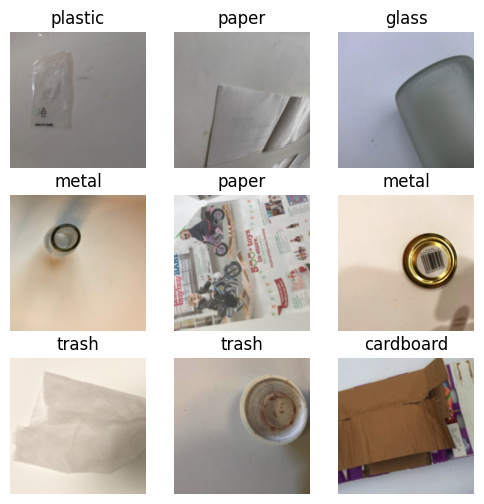

In [ ]:
# 📦 STEP 4: Load Data
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,            # 20% validation set
    item_tfms=Resize(224),    # Resize all images to 224x224
    batch_tfms=aug_transforms(mult=2.0)  # Data augmentation
)

# 👀 Optional: View some sample images
dls.show_batch(max_n=9, figsize=(6,6))

In [ ]:
# 🧠 STEP 5: Train the Model
learn = vision_learner(dls, resnet34, metrics=accuracy)  # You can try resnet18, resnet50 too
learn.fine_tune(4)



epoch,train_loss,valid_loss,accuracy,time
0,1.755577,0.537645,0.794059,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.840114,0.415092,0.845545,00:13
1,0.667319,0.420497,0.857426,00:14
2,0.520532,0.349588,0.887129,00:14
3,0.393479,0.320048,0.899010,00:14


(#2) [0.3451920747756958,0.893069326877594]

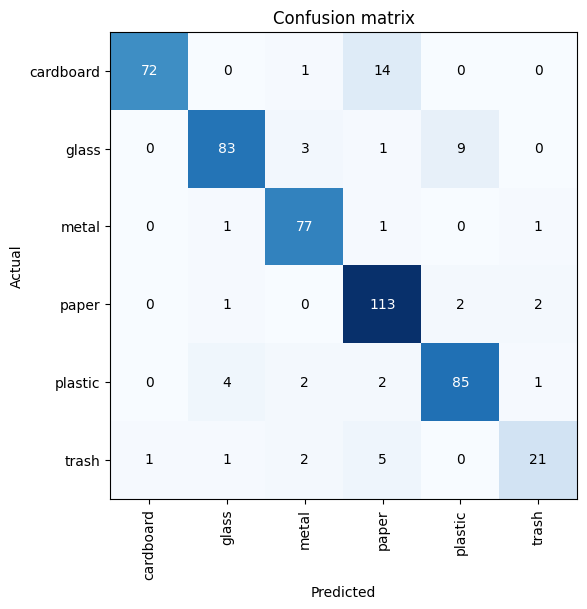

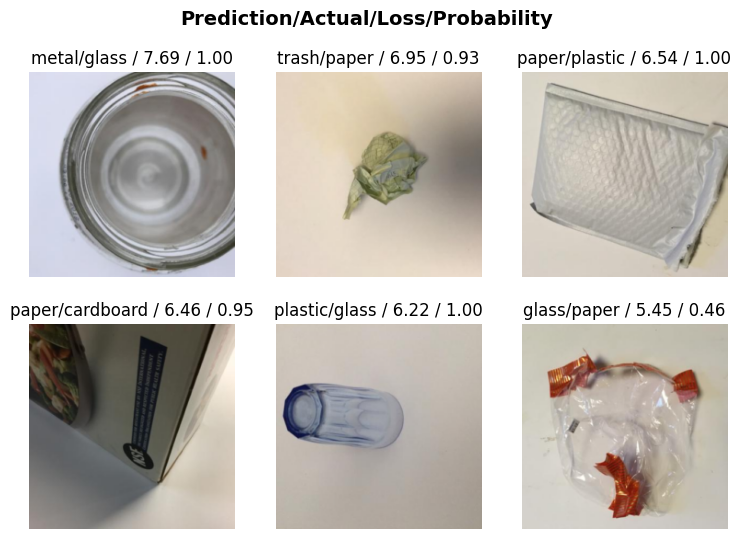

In [ ]:
# 📊 STEP 6: Interpret Results
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))
interp.plot_top_losses(6, nrows=2)

# 📈 Optional: Show metrics
learn.validate()

In [ ]:
trash_type,int_prob,probs = learn.predict(PILImage.create('123.jpg'))
print(trash_type)

paper


In [ ]:
# 💾 STEP 7: Export the Model for Deployment
learn.export('trash_classifier.pkl')

# 🎉 Ready for Deployment using Gradio/Streamlit!